In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
bills_csvs = os.listdir('Bills_CSVs')
bills_dfs = [pd.read_csv('Bills_CSVs/'+csv) for csv in bills_csvs]

for df in bills_dfs:
    df['Date'] = pd.to_datetime(df['Date'])



In [3]:
bills_dfs[0].head()
for i in range(13):
    print(bills_dfs[i].shape)

(3358, 15)
(4269, 15)
(4113, 15)
(6235, 15)
(4775, 15)
(5023, 15)
(3776, 15)
(4851, 15)
(3540, 15)
(3857, 15)
(5603, 15)
(1699, 15)
(1674, 15)


In [4]:
b_game_1 = bills_dfs[0]

In [5]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
BillsNewsNow       161
JesusLife12         46
ChrisBrownBills     44
Pro__Ant            38
JaySkurski          38
dtype: int64


User
UberHansen       34
alexbrasky       33
thadbrown7       31
WGR550           31
BradleyGelber    31
dtype: int64

In [6]:
bills_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'NLTK_Sentiment_Analysis', 'TextBlob_Sentiment_Analysis',
       'Compound_Sentiment_Score', 'Positive_Sentiment'],
      dtype='object')

In [7]:
def make_scatter_and_pie_figure(df,fig_name, save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

In [8]:
bills_csvs

['Bills_Game10_Browns.csv',
 'Bills_Game11_Lions.csv',
 'Bills_Game12_Patriots',
 'Bills_Game1_Rams.csv',
 'Bills_Game2_Titans.csv',
 'Bills_Game3_Dolphins.csv',
 'Bills_Game4_Ravens.csv',
 'Bills_Game6_Chiefs.csv',
 'Bills_Game7_Packers.csv',
 'Bills_Game8_Jets.csv',
 'Bills_Game9_Vikings.csv',
 'Bills_Pre_Game1_Colts.csv',
 'Bills_Pre_Game2_Broncos.csv',
 'Bills_Pre_Game3_Panthers.csv']

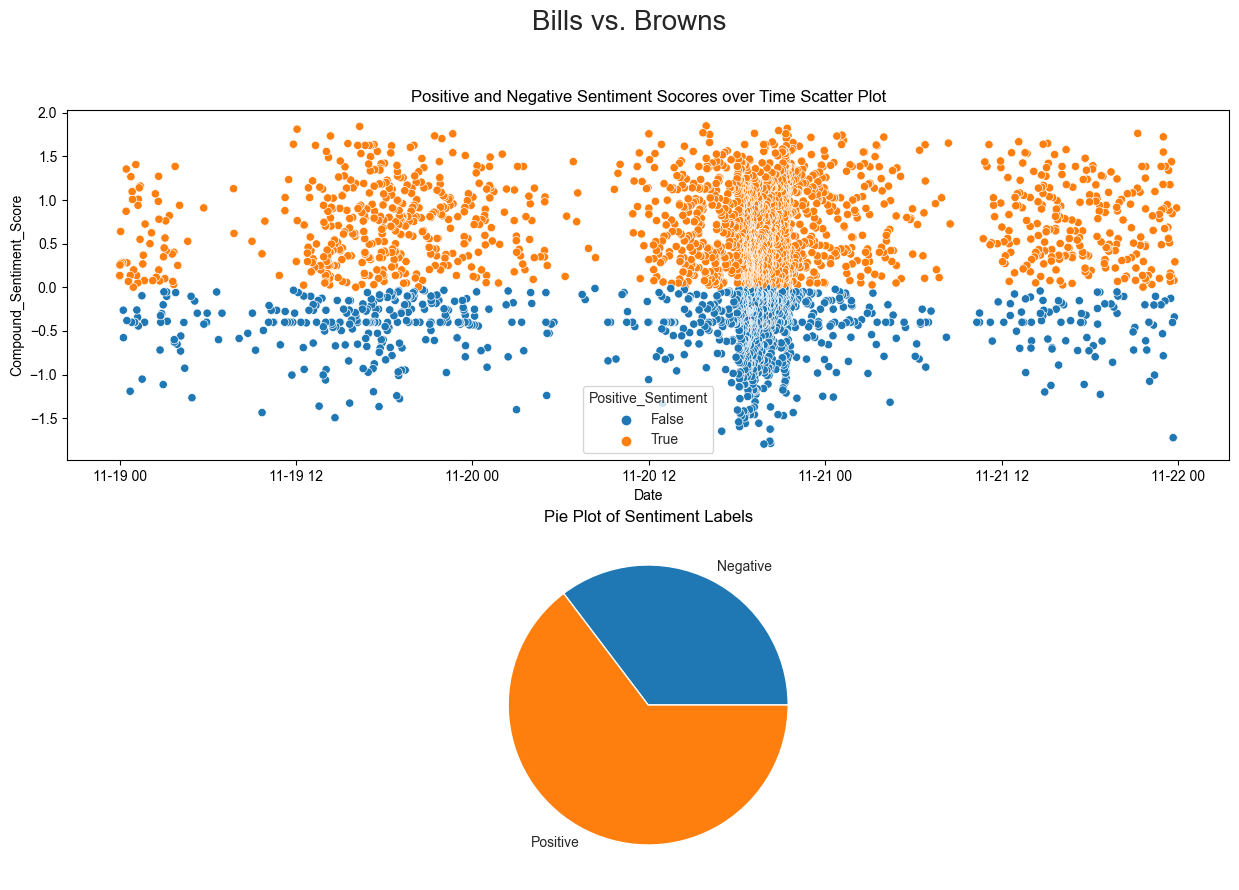

In [9]:
make_scatter_and_pie_figure(bills_dfs[0], 'Bills vs. Browns')

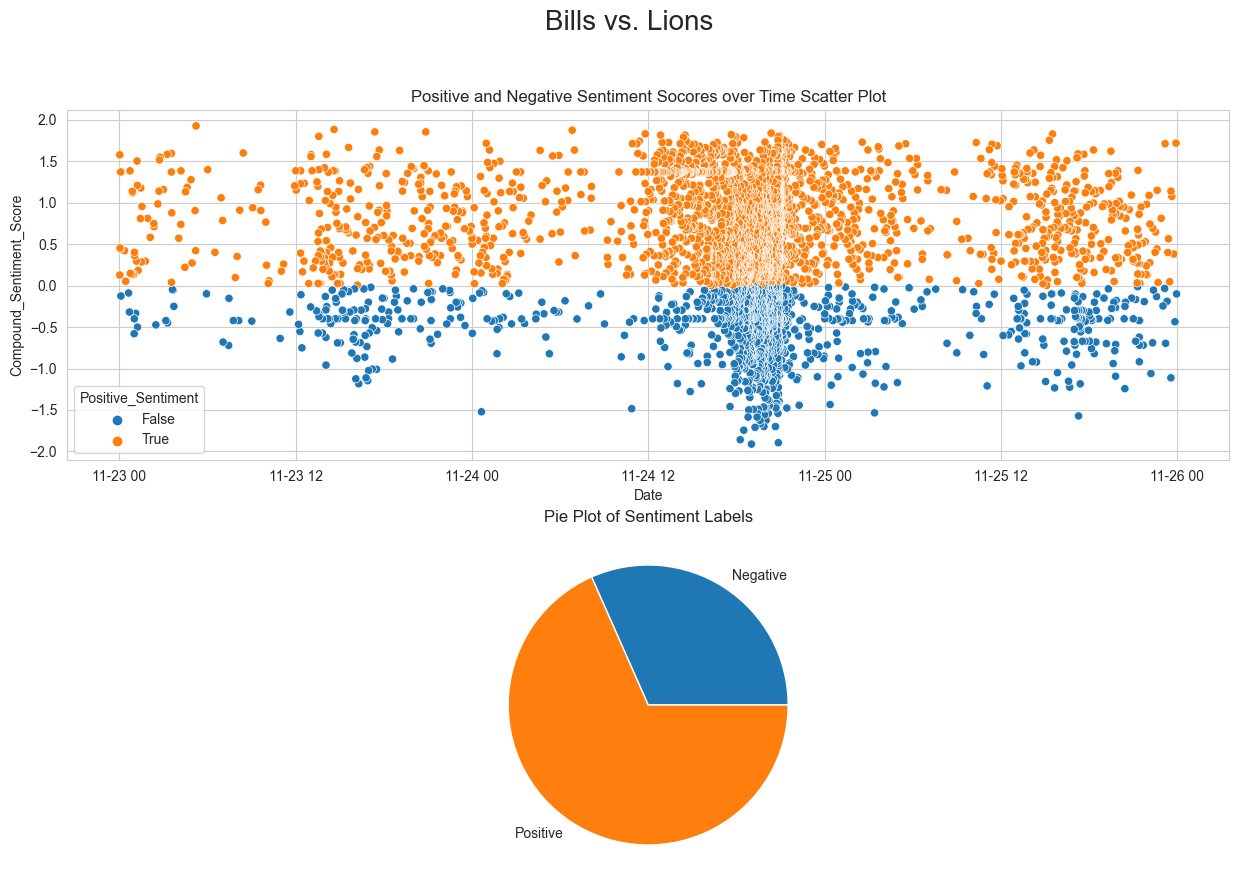

In [10]:
make_scatter_and_pie_figure(bills_dfs[1], 'Bills vs. Lions')

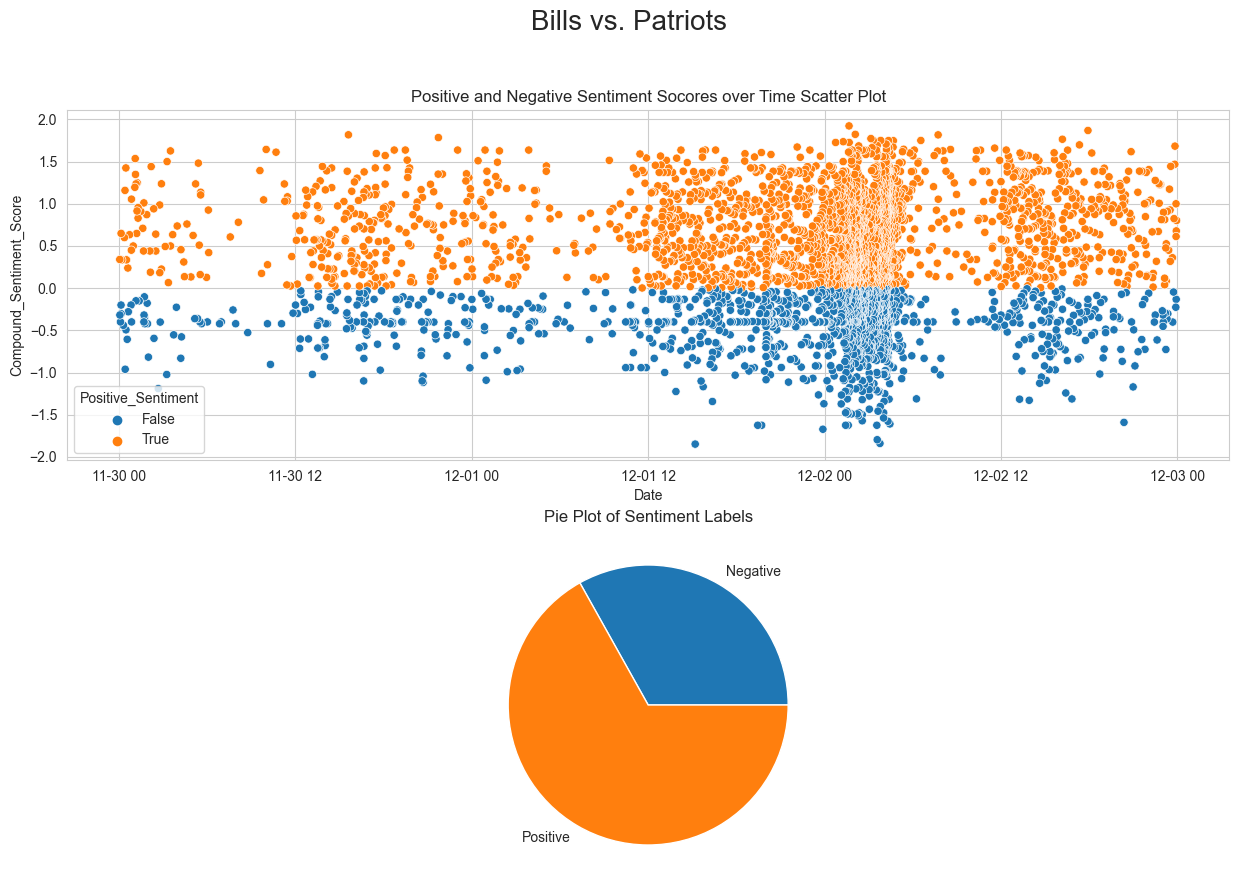

In [11]:
make_scatter_and_pie_figure(bills_dfs[2], 'Bills vs. Patriots')

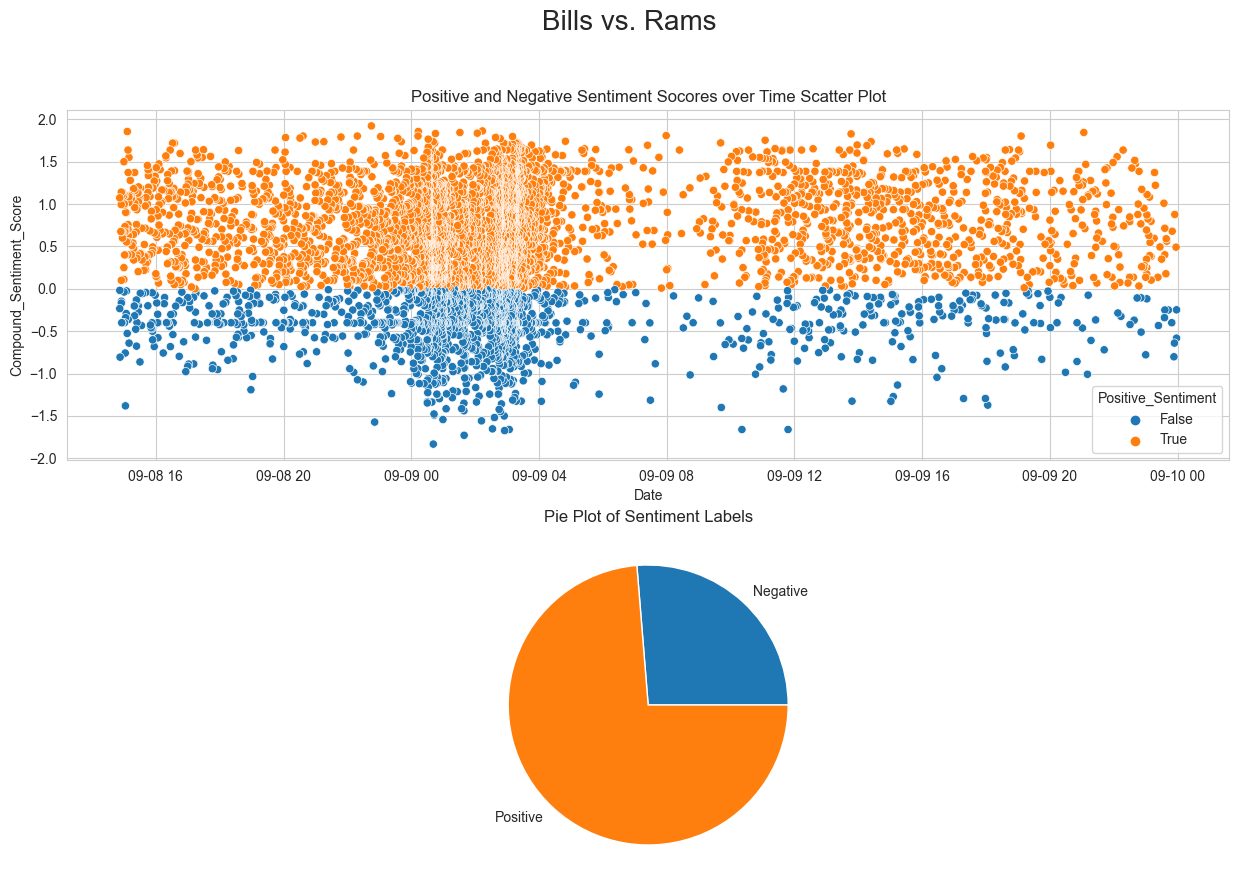

In [12]:
make_scatter_and_pie_figure(bills_dfs[3], 'Bills vs. Rams')

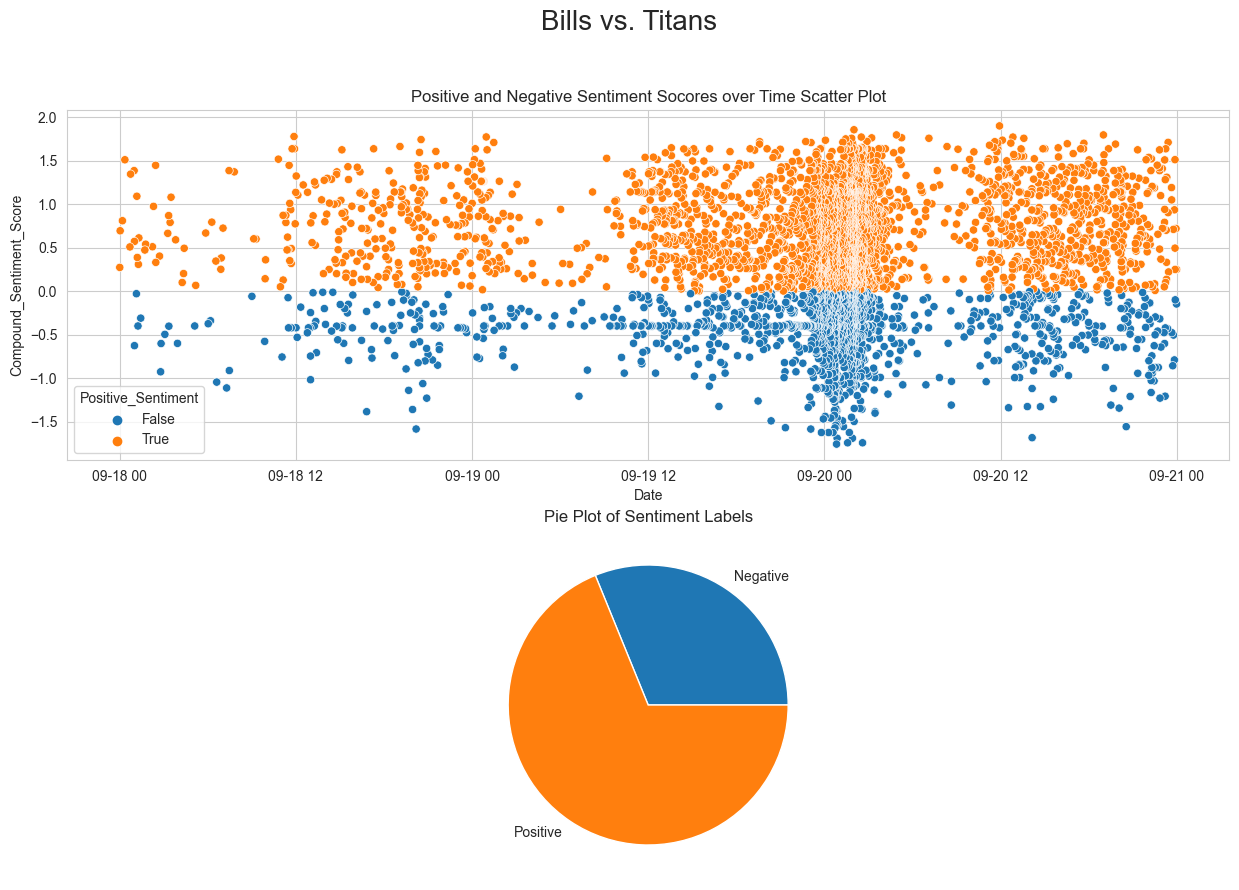

In [13]:
make_scatter_and_pie_figure(bills_dfs[4], 'Bills vs. Titans')

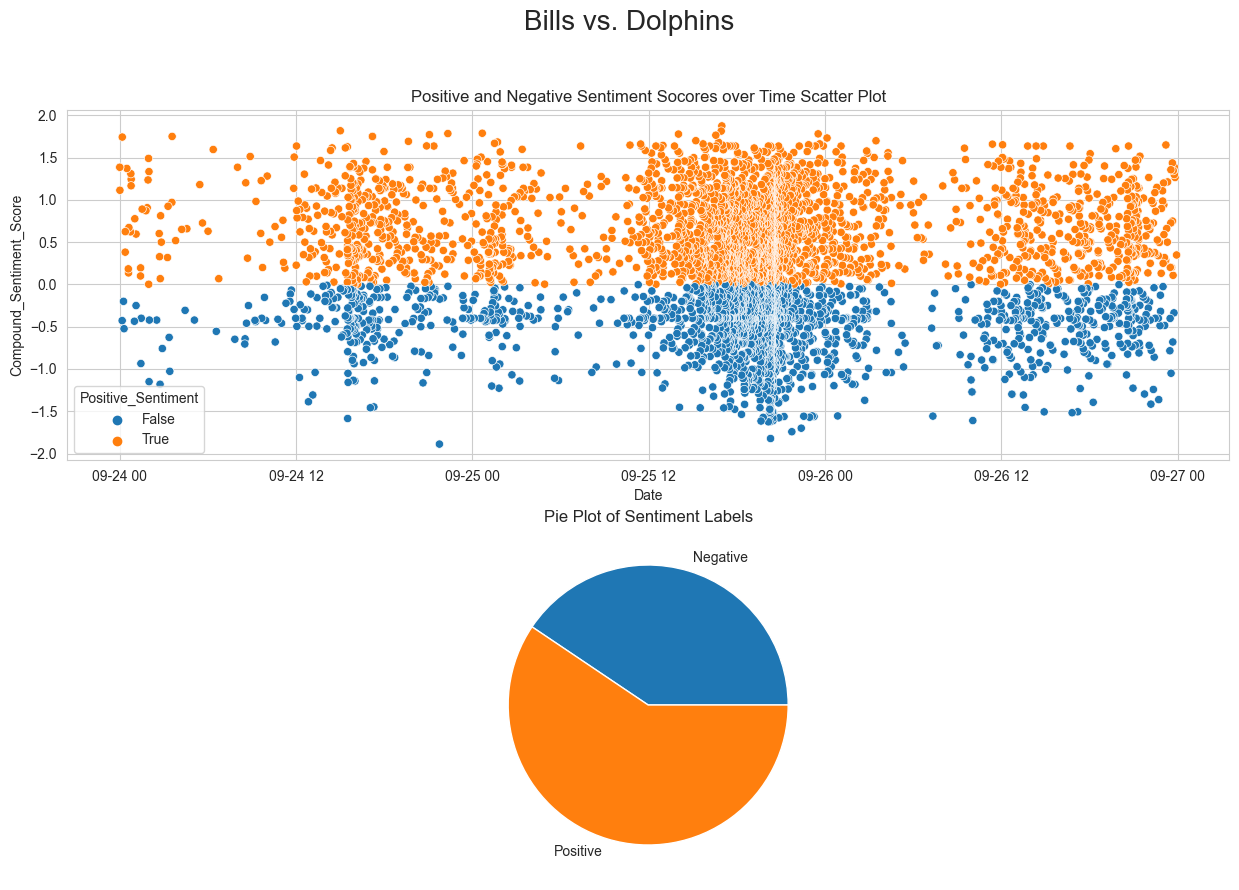

In [14]:
make_scatter_and_pie_figure(bills_dfs[5], 'Bills vs. Dolphins')

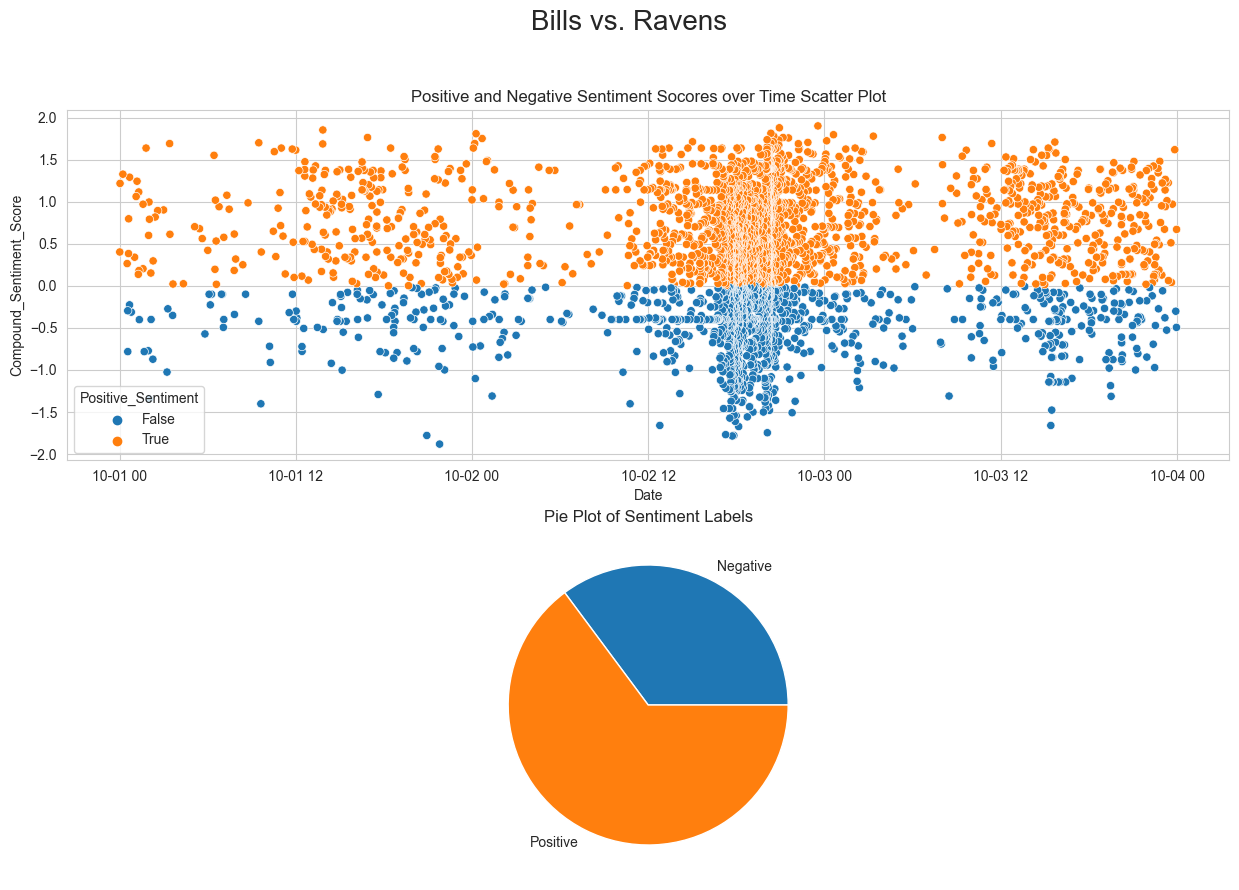

In [15]:
make_scatter_and_pie_figure(bills_dfs[6], 'Bills vs. Ravens')

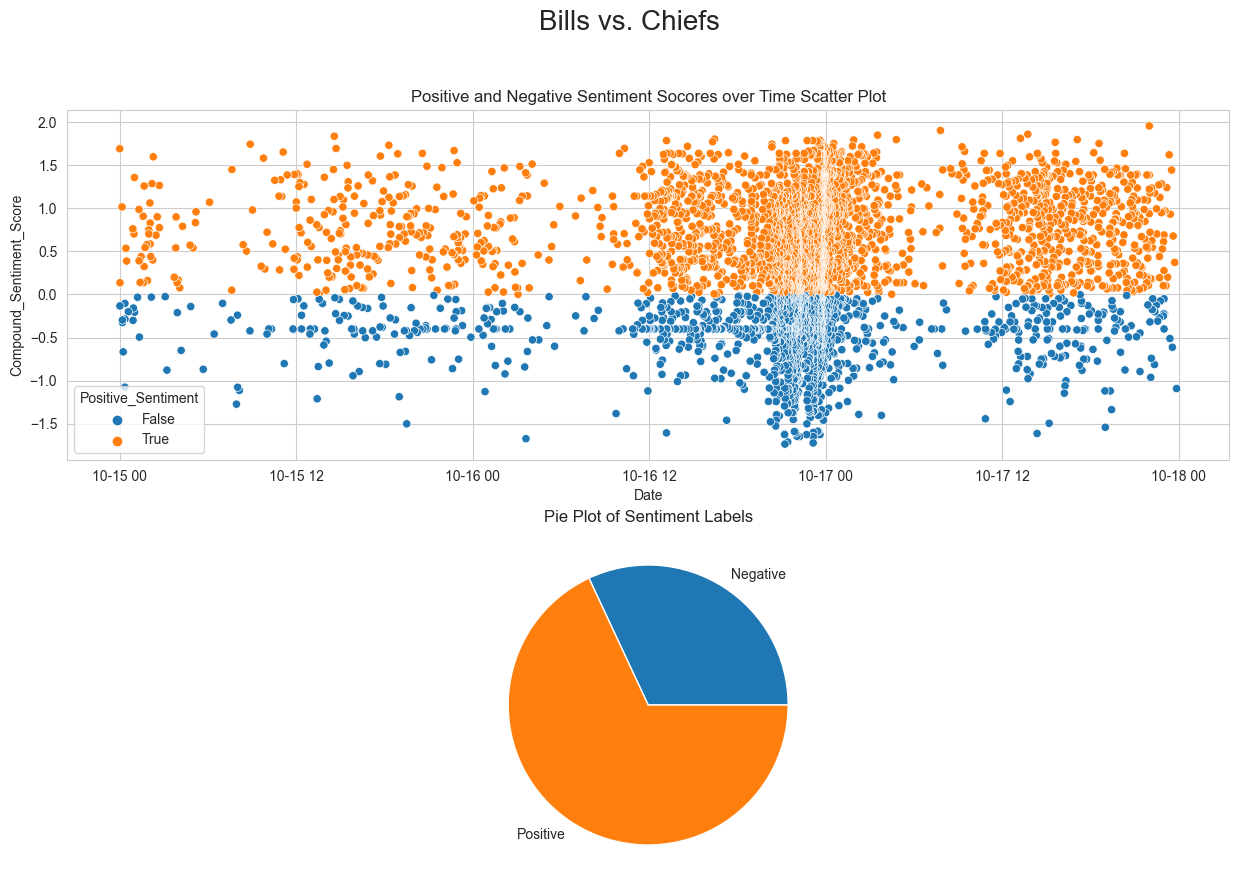

In [16]:
make_scatter_and_pie_figure(bills_dfs[7], 'Bills vs. Chiefs')

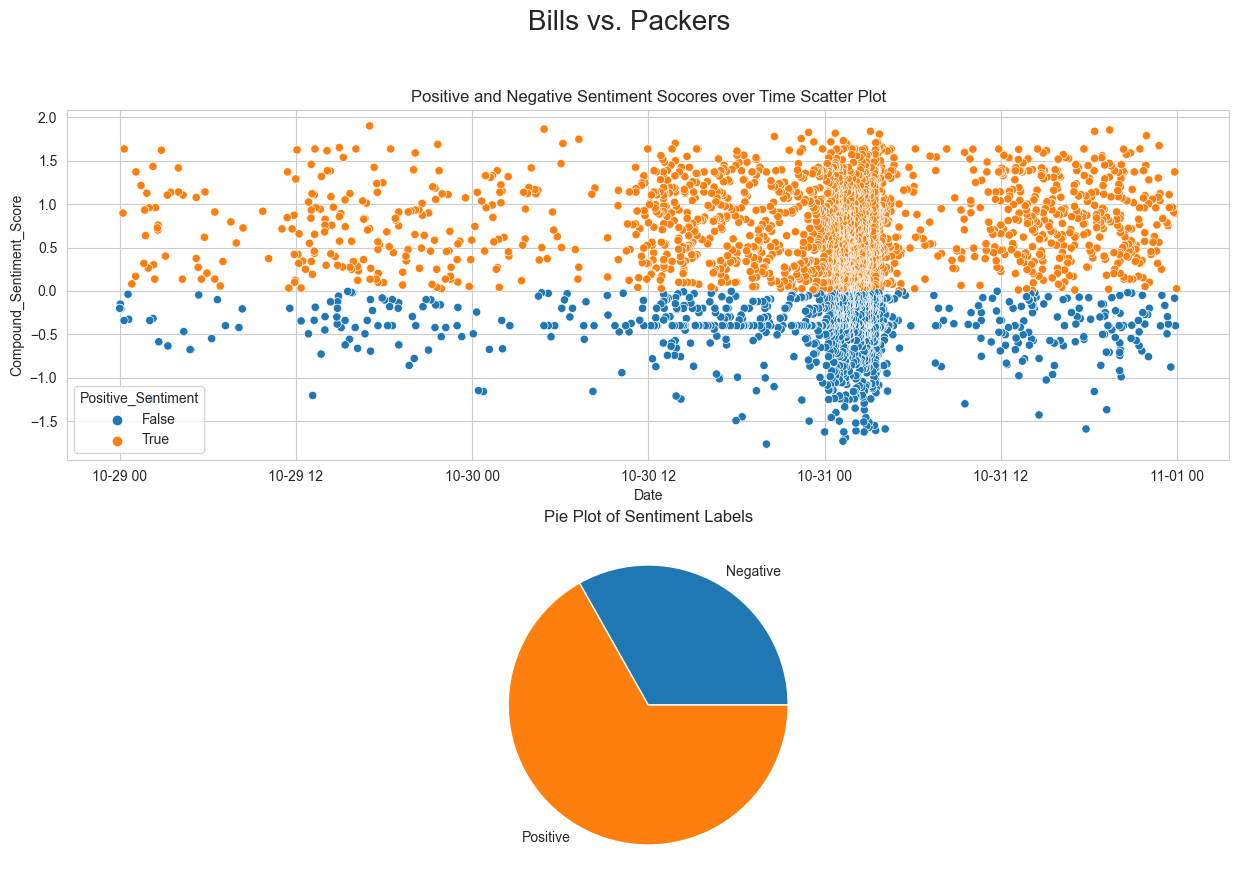

In [17]:
make_scatter_and_pie_figure(bills_dfs[8], 'Bills vs. Packers')

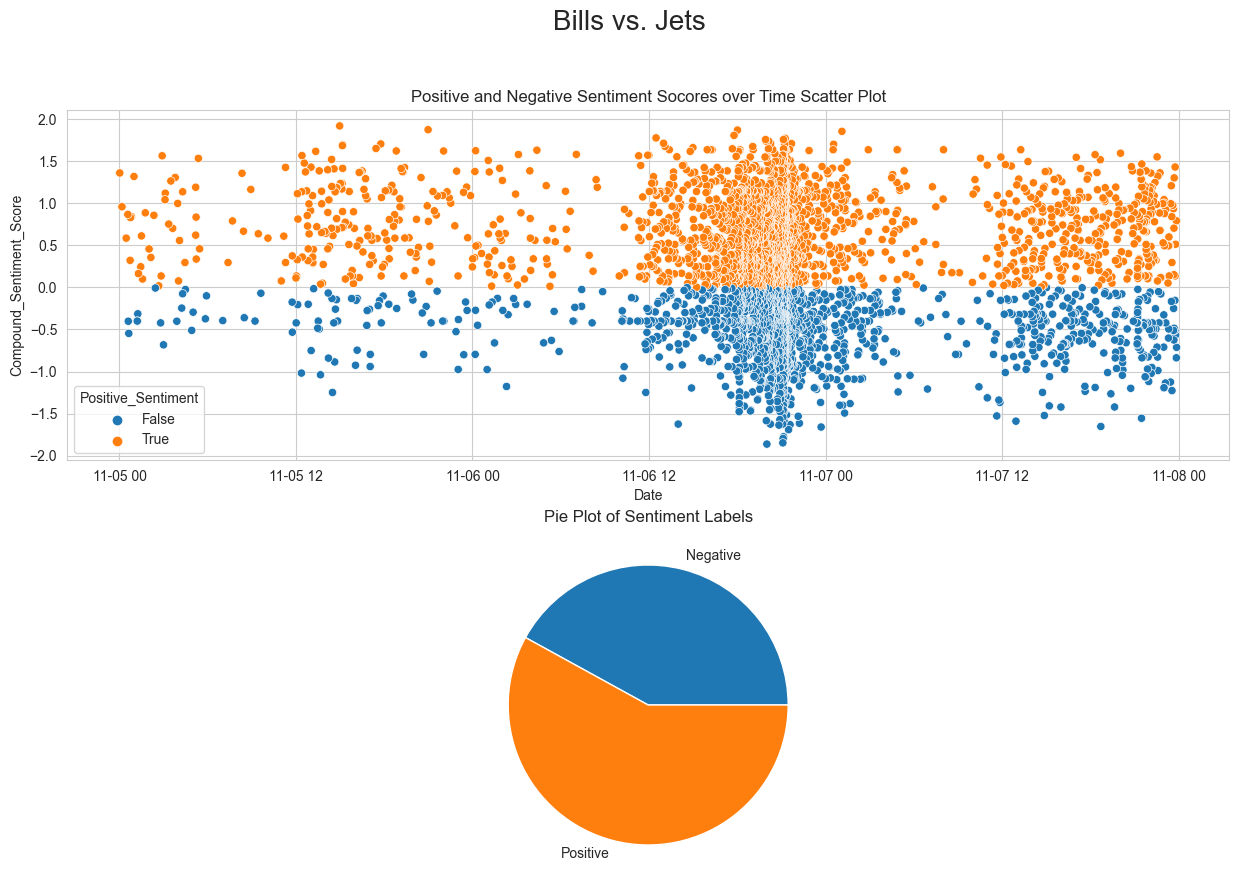

In [18]:
make_scatter_and_pie_figure(bills_dfs[9], 'Bills vs. Jets')

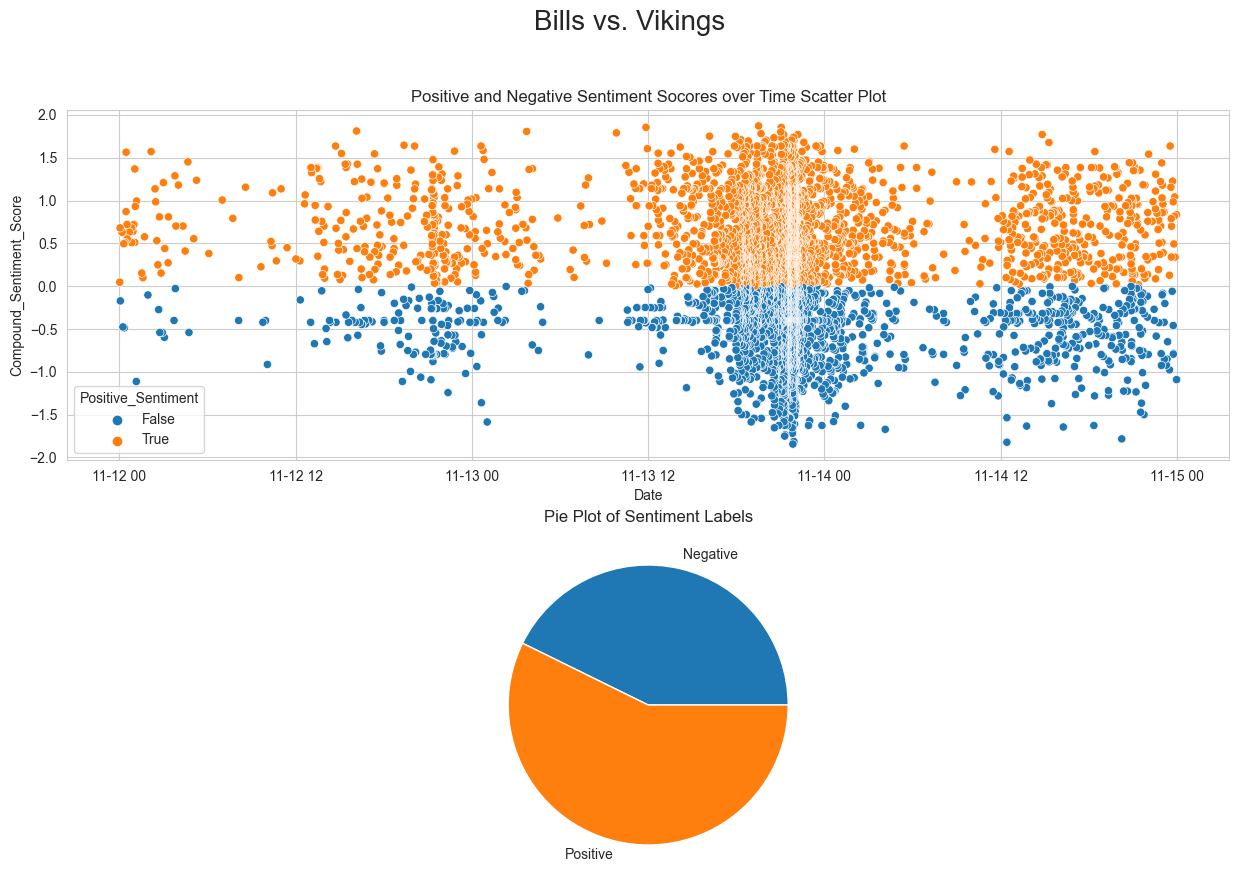

In [19]:
make_scatter_and_pie_figure(bills_dfs[10], 'Bills vs. Vikings')

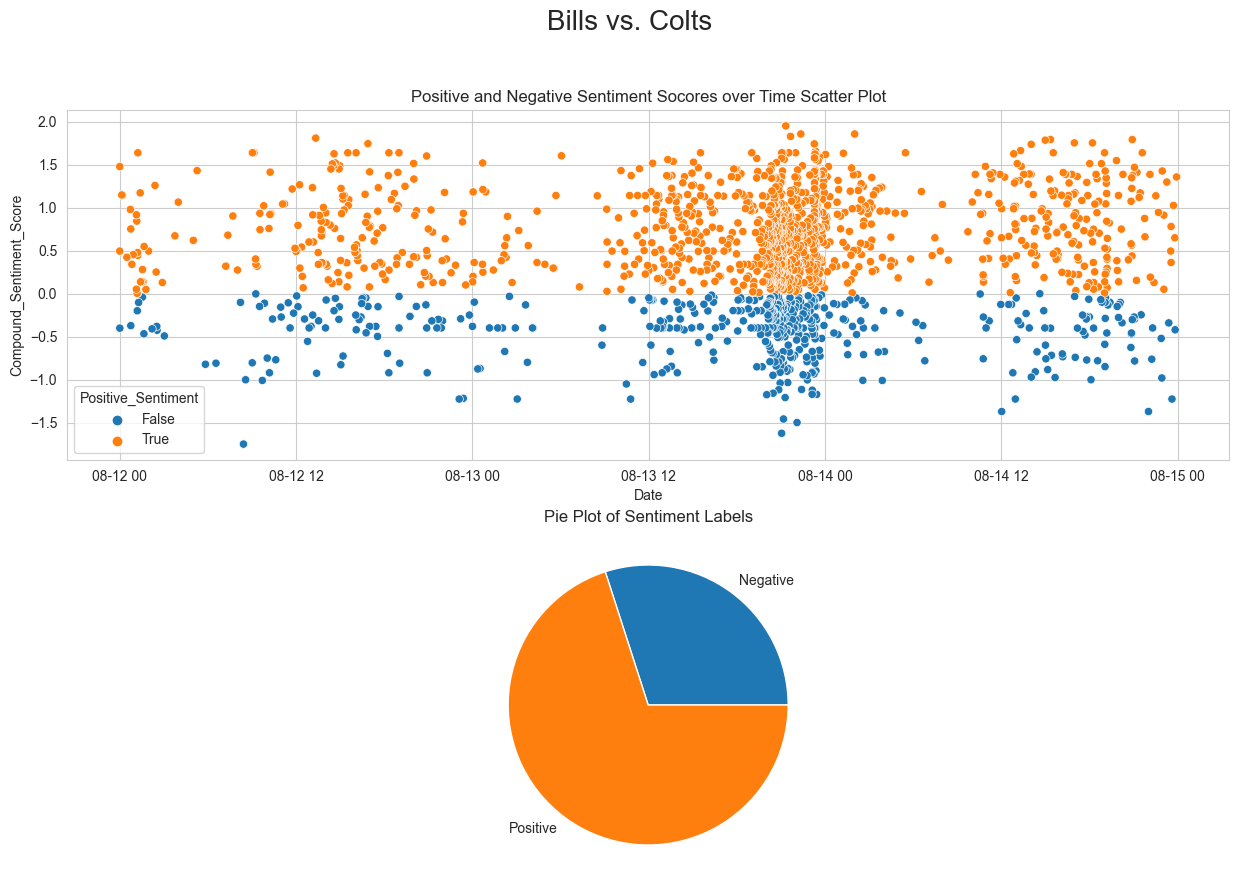

In [20]:
make_scatter_and_pie_figure(bills_dfs[11], 'Bills vs. Colts')

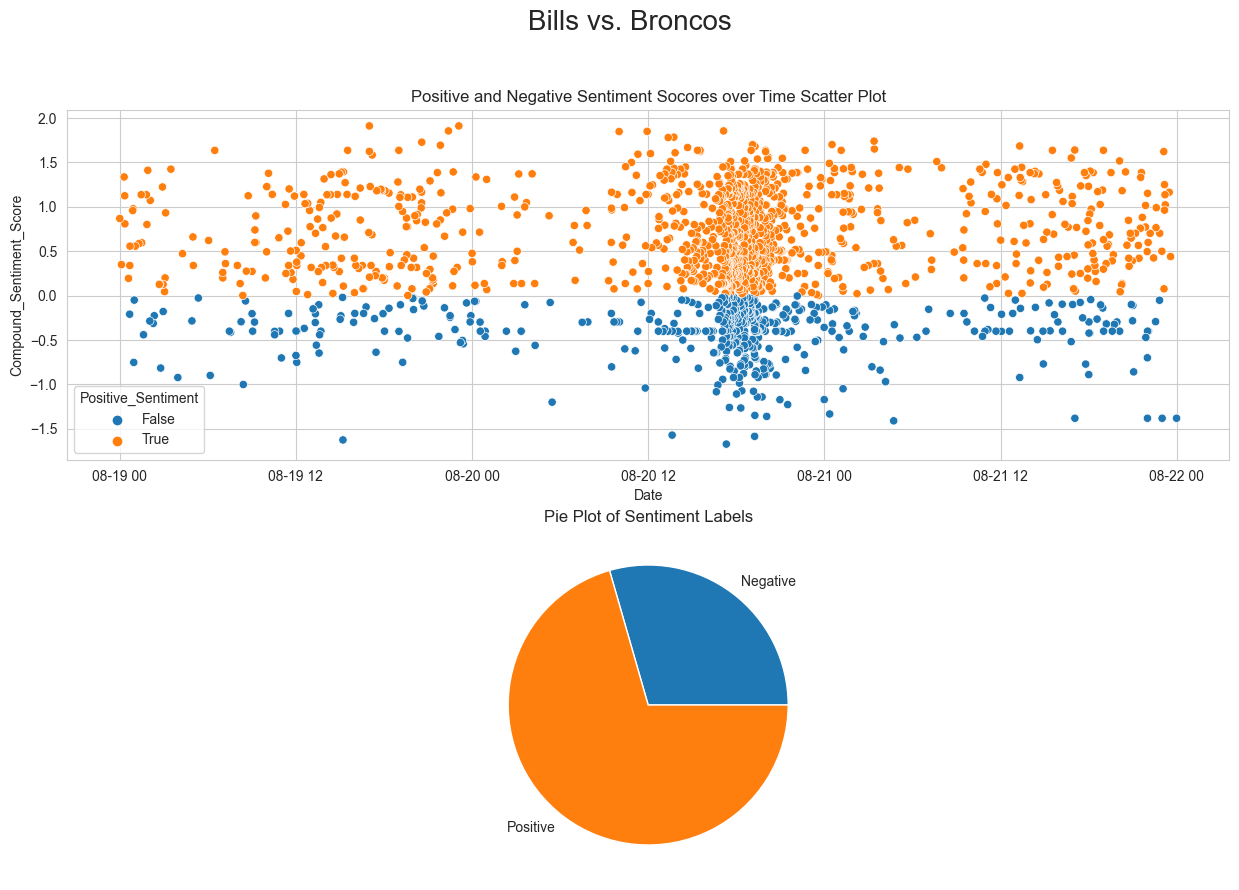

In [21]:
make_scatter_and_pie_figure(bills_dfs[12], 'Bills vs. Broncos')

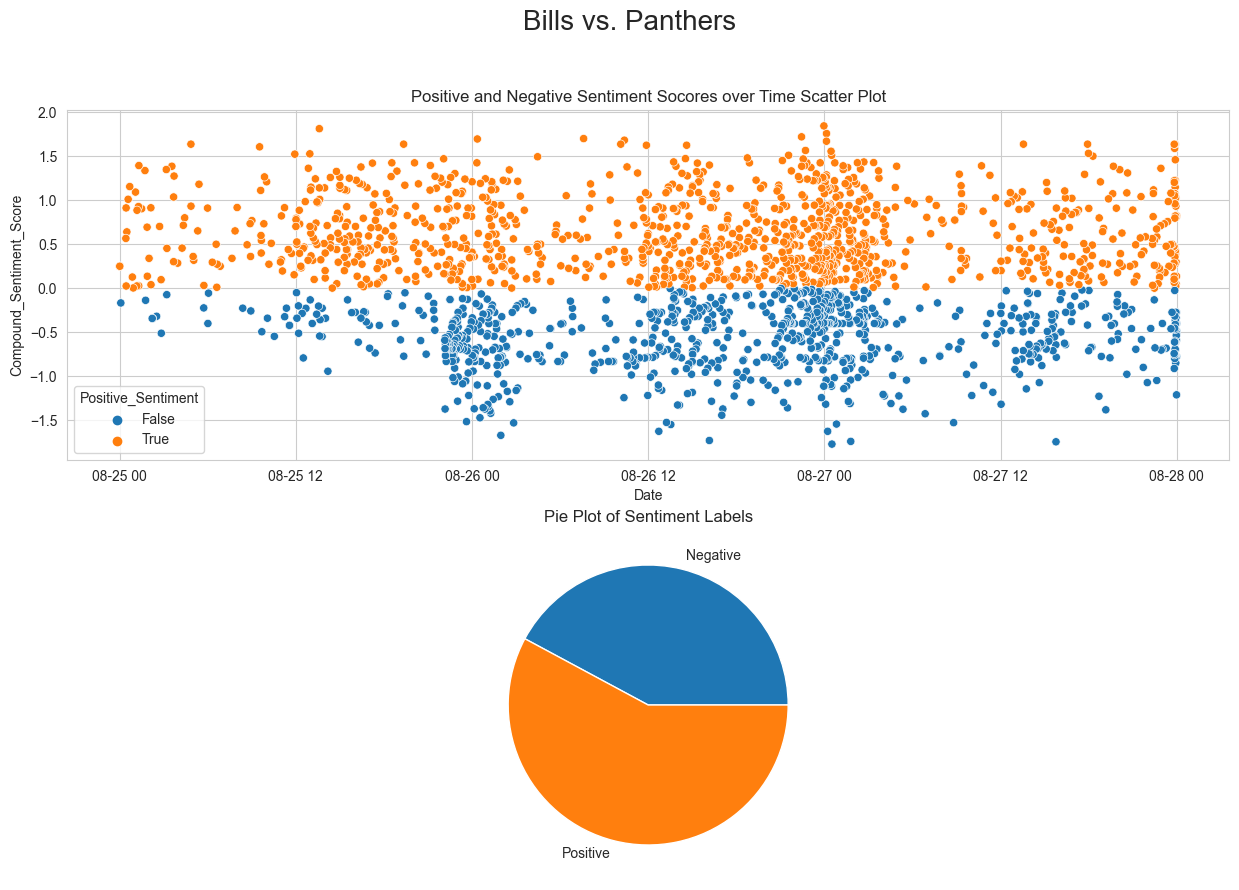

In [22]:
make_scatter_and_pie_figure(bills_dfs[13], 'Bills vs. Panthers')

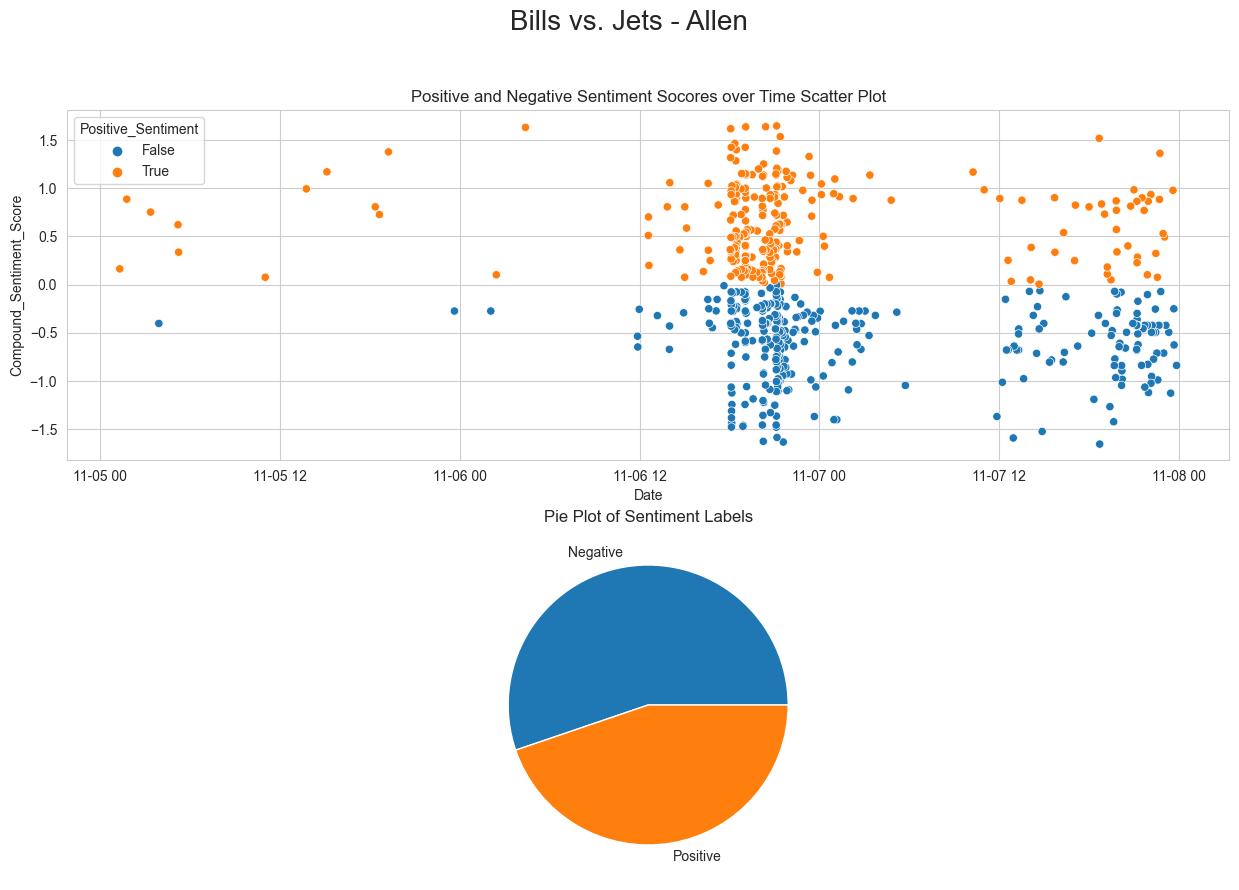

In [23]:
allen_df3 = bills_dfs[9].loc[bills_dfs[9]['clean_Tweet'].str.contains('allen')]
make_scatter_and_pie_figure(allen_df3, 'Bills vs. Jets - Allen')

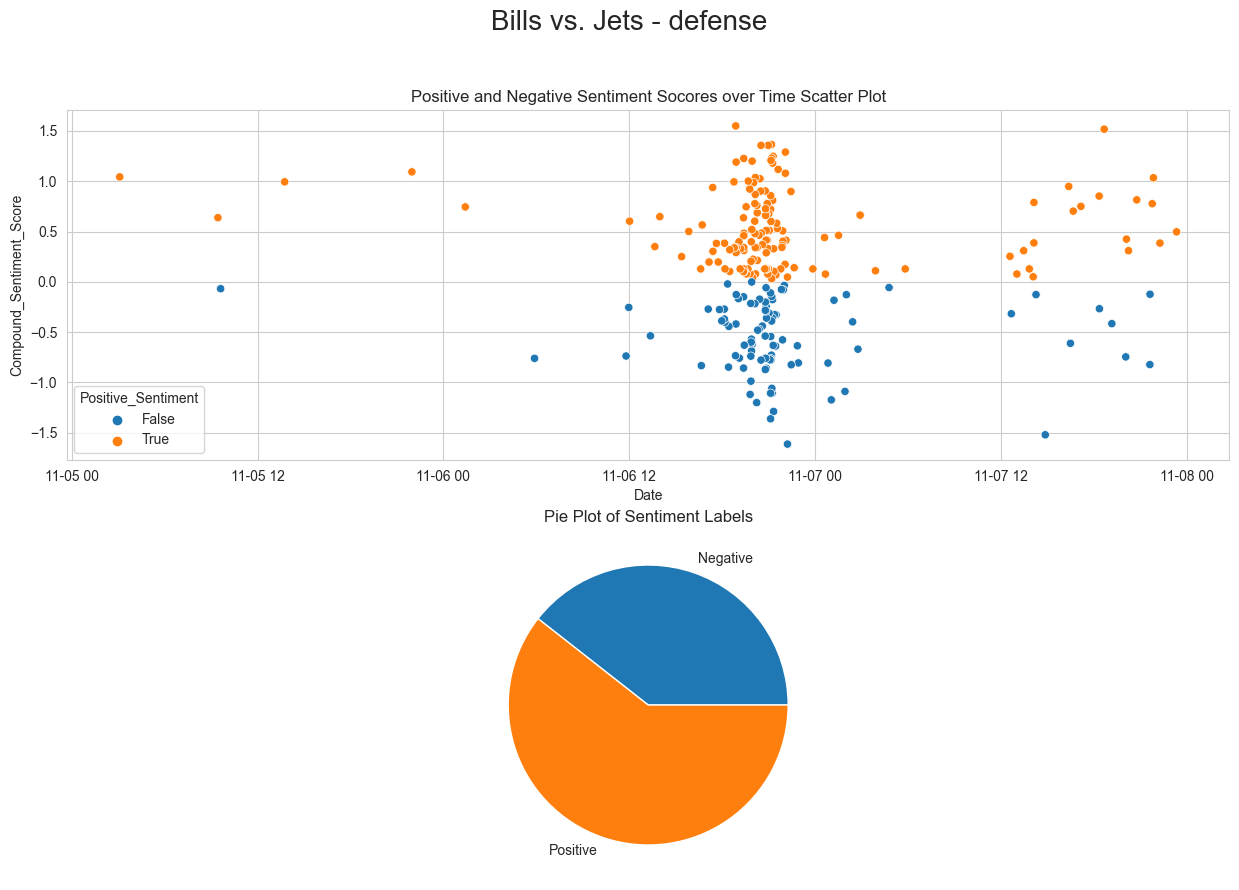

In [24]:
defense_df2 = bills_dfs[9].loc[bills_dfs[9]['clean_Tweet'].str.contains('defense')]
make_scatter_and_pie_figure(defense_df2, 'Bills vs. Jets - defense')